In [23]:
import PIL
import matplotlib
%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
import numpy as np
import pandas as pd

Using matplotlib backend: <object object at 0x7ff17f1c5150>


In [11]:
df = pd.read_csv('./croped_all_df.csv')
df.head(10)

,file_name,center_x,center_y,a,b,c,d,x,y,w,h,ssim,pnsr,mse,histDitance,n_hamming_distance,hash,hashPercent,previous_cropUrl
0,./crop/0-2zUwL.jpg,1125.5,644.5,1296.969738,1296.969738,1296.969738,1296.969738,1051,556,1200,733,1.000000,361.201999,0.000000,0,0.000000,16050461852311748736,100.0000,./crop/0-2zUwL.jpg
1,./crop/0-grWg9.jpg,1153.0,714.0,1356.172924,1356.172924,1356.172924,1356.172924,1026,535,1280,893,0.132794,12.339354,87.931129,71843,0.296875,18300826926748532736,70.3125,./crop/0-2zUwL.jpg
2,./crop/1-EktKu.jpg,1112.0,741.5,1336.550130,1336.550130,1336.550130,1336.550130,945,502,1279,981,0.244592,12.044071,71.724329,58692,0.203125,18445830245069094912,79.6875,./crop/0-grWg9.jpg
3,./crop/1-rHefO.jpg,1123.5,655.0,1300.491157,1300.491157,1300.491157,1300.491157,1046,557,1201,753,0.153571,10.841496,89.824668,129769,0.281250,16050424468849328336,71.8750,./crop/1-EktKu.jpg
4,./crop/1-C7A1m.jpg,1179.0,676.5,1359.298808,1359.298808,1359.298808,1359.298808,1079,507,1279,846,0.102524,10.999856,89.224545,38797,0.328125,18012697565006463488,67.1875,./crop/1-rHefO.jpg
5,./crop/1-3ryNx.jpg,1167.5,616.0,1320.042518,1320.042518,1320.042518,1320.042518,1134,554,1201,678,0.182172,12.942508,89.949100,45866,0.265625,18009956654328578054,73.4375,./crop/1-C7A1m.jpg
6,./crop/1-wiyGz.jpg,1142.5,835.0,1415.108211,1415.108211,1415.108211,1415.108211,1005,670,1280,1000,0.059230,11.199795,90.186086,125520,0.343750,10230474110371139585,65.6250,./crop/1-3ryNx.jpg
7,./crop/2-WE2S6.jpg,1106.0,744.5,1333.235257,1333.235257,1333.235257,1333.235257,935,502,1277,987,0.220679,11.073861,69.956566,7505,0.265625,18445865429441183744,73.4375,./crop/1-wiyGz.jpg
8,./crop/3-uLQq7.jpg,1100.5,735.5,1323.654222,1323.654222,1323.654222,1323.654222,921,499,1280,972,0.318487,13.652413,67.602749,2203,0.062500,18302031721710747648,93.7500,./crop/2-WE2S6.jpg
9,./crop/3-lCUZy.jpg,1163.0,626.0,1320.774394,1320.774394,1320.774394,1320.774394,1046,503,1280,749,0.160014,10.485408,87.571739,111389,0.250000,17994609086888411521,75.0000,./crop/3-uLQq7.jpg


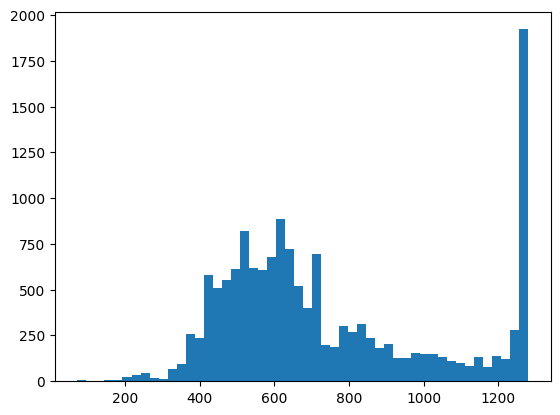

In [12]:
# На данном графике мы видим распределение по ширине
# Попробуем выбрать в ручную фильтрацию где-то в
# пределах от 300 до 800
plt.hist(df.w, bins=50)
plt.show()

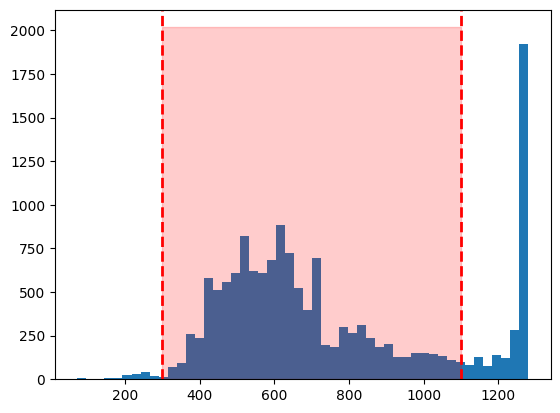

In [15]:
fig, ax = plt.subplots()
ax.hist(df.w, bins=50)
ax.axvline(300, color='r', linestyle='dashed', linewidth=2)
ax.axvline(1100, color='r', linestyle='dashed', linewidth=2)
ax.fill_between([300, 1100], 0, ax.get_ylim()[1], color='r', alpha=0.2)
plt.show()

In [16]:
df_ = df[(df.w > 300) & (df.w < 1100)]
df_.reset_index(drop=True, inplace=True)
df_

,file_name,center_x,center_y,a,b,c,d,x,y,w,h,ssim,pnsr,mse,histDitance,n_hamming_distance,hash,hashPercent,previous_cropUrl
0,./crop/12-EOqX5.jpg,714.0,719.0,1013.290185,1013.290185,1013.290185,1013.290185,510,452,918,986,0.229444,12.062348,98.620700,25403,0.406250,9158367911671234560,59.3750,./crop/11-KlFfs.jpg
1,./crop/13-7rEKA.jpg,638.0,737.0,974.788695,974.788695,974.788695,974.788695,429,483,847,991,0.318146,10.684107,98.735611,6330,0.390625,9444011018960273536,60.9375,./crop/12-EOqX5.jpg
2,./crop/14-hdLmU.jpg,605.5,737.0,953.833974,953.833974,953.833974,953.833974,420,494,791,980,0.155780,8.644739,94.591283,43204,0.406250,9299932947295535232,59.3750,./crop/13-ny6xU.jpg
3,./crop/15-pkaOy.jpg,610.0,741.0,959.781746,959.781746,959.781746,959.781746,433,488,787,994,0.516124,15.179569,59.019363,3215,0.046875,9299933222433489024,95.3125,./crop/14-hdLmU.jpg
4,./crop/16-IZtcq.jpg,610.5,738.0,957.786119,957.786119,957.786119,957.786119,432,480,789,996,0.546068,16.071836,58.937635,1293,0.062500,9479936470006399104,93.7500,./crop/15-pkaOy.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11758,./crop/8164-EjOq7.jpg,718.0,722.5,1018.592288,1018.592288,1018.592288,1018.592288,563,456,873,989,0.235336,11.944646,98.222709,53266,0.281250,18446529668942135296,71.8750,./crop/8164-HIImc.jpg
11759,./crop/8165-jMHci.jpg,733.0,710.5,1020.832626,1020.832626,1020.832626,1020.832626,598,432,868,989,0.716004,19.876060,58.747035,3974,0.078125,18446594544423142400,92.1875,./crop/8164-EjOq7.jpg
11760,./crop/8166-F7B0q.jpg,630.5,618.0,882.867062,882.867062,882.867062,882.867062,533,373,728,863,0.240518,13.626147,104.885400,35097,0.296875,18446742974197923840,70.3125,./crop/8165-qHvdu.jpg
11761,./crop/8167-7gnhI.jpg,604.5,591.5,845.749667,845.749667,845.749667,845.749667,516,360,693,823,0.229908,10.912746,101.907494,4810,0.328125,9187342170388955136,67.1875,./crop/8166-S9Hwf.jpg


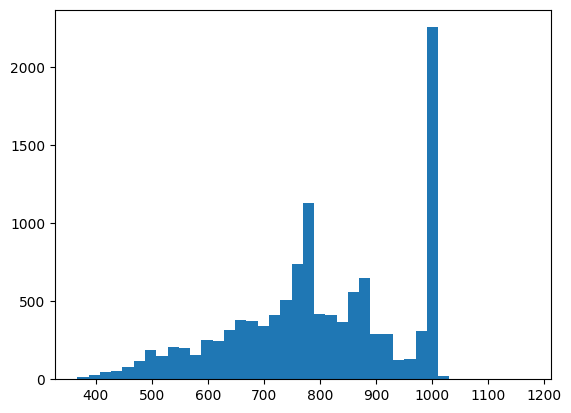

In [17]:
# На данном графике мы видим распределение по высоте
# Попробуем выбрать в ручную фильтрацию где-то в
# пределах от 480 до 890
plt.hist(df_.h, bins=40)
plt.show()

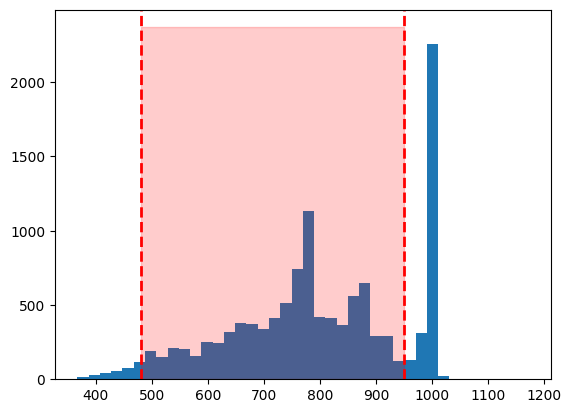

In [19]:
# Отобразим график с явно выраженной фильтрацией
fig, ax = plt.subplots()
ax.hist(df_.h, bins=40)
ax.axvline(480, color='r', linestyle='dashed', linewidth=2)
ax.axvline(950, color='r', linestyle='dashed', linewidth=2)
ax.fill_between([480, 950], 0, ax.get_ylim()[1], color='r', alpha=0.2)
plt.show()

In [93]:
new_df = df[(df.h - df.y > 200) & (df.h - df.y < 950) & (df.w - df.x > 130) & (df.w - df.x <= 420)]
new_df.reset_index(drop=True, inplace=True)
new_df

,file_name,center_x,center_y,a,b,c,d,x,y,w,h,ssim,pnsr,mse,histDitance,n_hamming_distance,hash,hashPercent,previous_cropUrl
0,./crop/0-grWg9.jpg,1153.0,714.0,1356.172924,1356.172924,1356.172924,1356.172924,1026,535,1280,893,0.132794,12.339354,87.931129,71843,0.296875,18300826926748532736,70.3125,./crop/0-2zUwL.jpg
1,./crop/1-EktKu.jpg,1112.0,741.5,1336.550130,1336.550130,1336.550130,1336.550130,945,502,1279,981,0.244592,12.044071,71.724329,58692,0.203125,18445830245069094912,79.6875,./crop/0-grWg9.jpg
2,./crop/1-C7A1m.jpg,1179.0,676.5,1359.298808,1359.298808,1359.298808,1359.298808,1079,507,1279,846,0.102524,10.999856,89.224545,38797,0.328125,18012697565006463488,67.1875,./crop/1-rHefO.jpg
3,./crop/1-wiyGz.jpg,1142.5,835.0,1415.108211,1415.108211,1415.108211,1415.108211,1005,670,1280,1000,0.059230,11.199795,90.186086,125520,0.343750,10230474110371139585,65.6250,./crop/1-3ryNx.jpg
4,./crop/2-WE2S6.jpg,1106.0,744.5,1333.235257,1333.235257,1333.235257,1333.235257,935,502,1277,987,0.220679,11.073861,69.956566,7505,0.265625,18445865429441183744,73.4375,./crop/1-wiyGz.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,./crop/8190-R7Cd7.jpg,1062.5,756.5,1304.300004,1304.300004,1304.300004,1304.300004,883,513,1242,1000,0.160409,12.322301,79.177664,55860,0.328125,17938082064005873664,67.1875,./crop/8189-ie6pK.jpg
10861,./crop/8191-iecgg.jpg,1162.5,561.5,1291.002905,1291.002905,1291.002905,1291.002905,1095,459,1230,664,0.415786,12.685493,63.219739,565,0.171875,13830280683710316656,82.8125,./crop/8190-fmCrH.jpg
10862,./crop/8192-jaoxv.jpg,1143.5,557.5,1272.162922,1272.162922,1272.162922,1272.162922,1056,454,1231,661,0.252186,11.331069,78.416959,6159,0.234375,14974402521898991616,76.5625,./crop/8191-iecgg.jpg
10863,./crop/8192-oQE8h.jpg,1144.0,593.0,1288.559273,1288.559273,1288.559273,1288.559273,1051,452,1237,734,0.312610,12.880445,73.481969,10128,0.187500,17280243058264268912,81.2500,./crop/8192-jaoxv.jpg


In [94]:
def show_image_by_url(url, w=2, h=2):
    image = cv2.imread(url)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # преобразование порядка цветов
    plt.figure(figsize=(w,h))
    plt.grid(False)
    plt.imshow(image)
    plt.show()

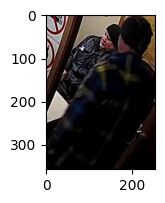

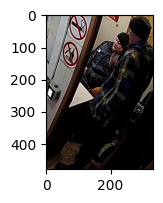

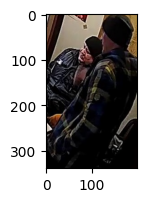

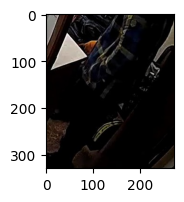

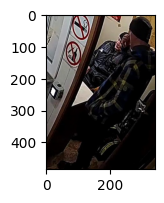

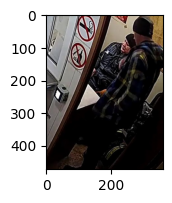

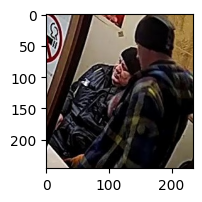

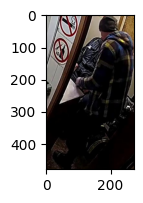

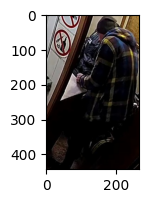

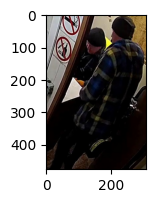

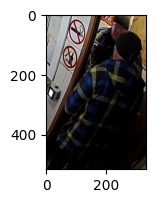

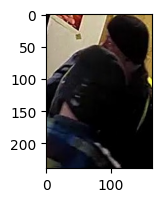

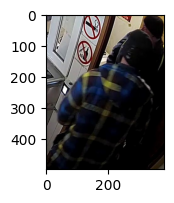

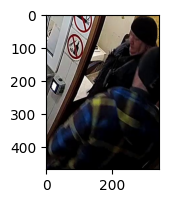

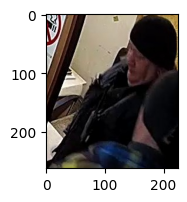

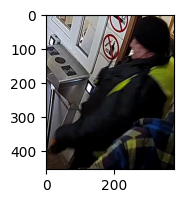

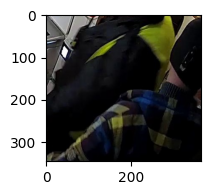

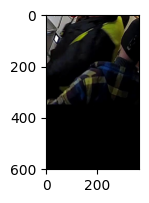

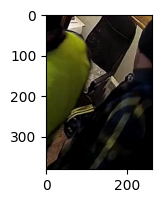

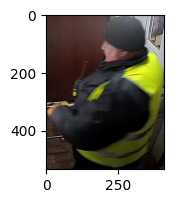

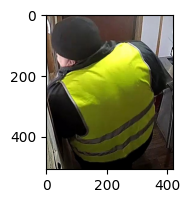

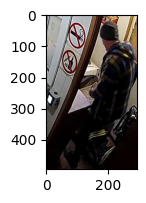

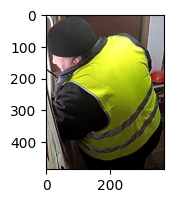

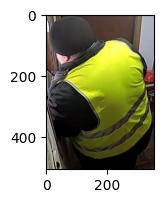

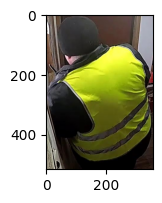

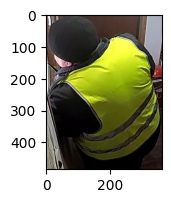

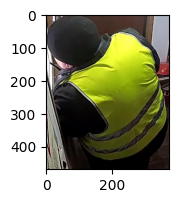

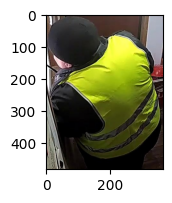

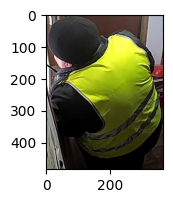

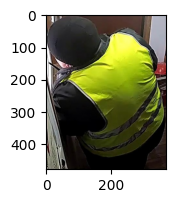

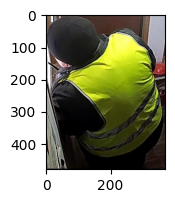

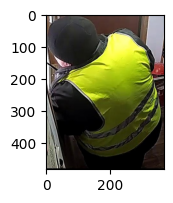

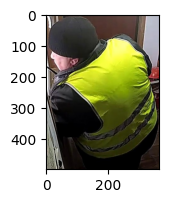

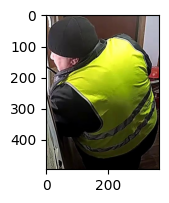

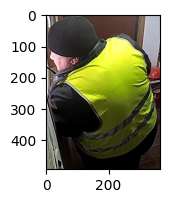

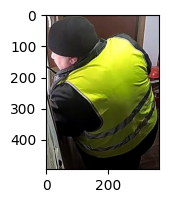

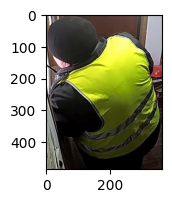

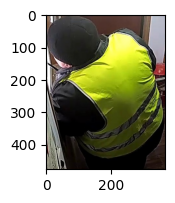

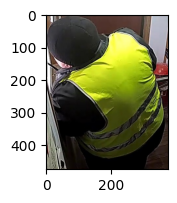

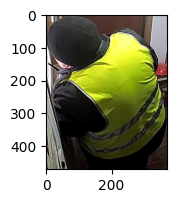

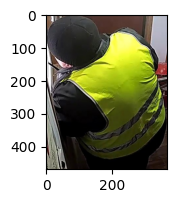

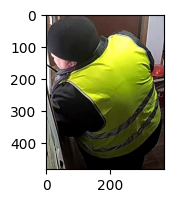

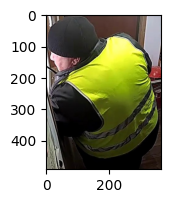

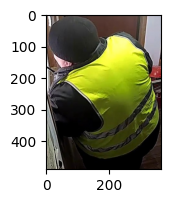

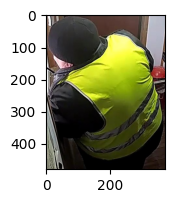

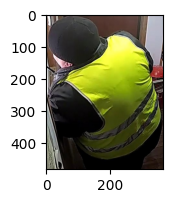

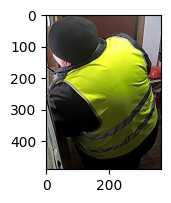

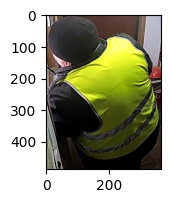

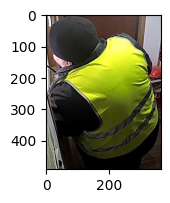

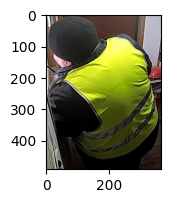

In [95]:
for index, row in new_df.head(50).iterrows():
    image_url = row["file_name"]
    show_image_by_url(image_url)

In [96]:
new_df.to_csv('after_filter.csv', index=False)